In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_theme()

In [2]:
files = [file for file in os.listdir(".\\") if file.endswith(".csv")]
files = files[:-1]

In [3]:
data_list = {}
df = pd.DataFrame([])
for file in files:
    data = pd.read_csv(file)
    data_list[file] = data
    df = pd.concat([df, pd.DataFrame([data["accuracy"].mean(), data["recall"].mean(), data["precision"].mean(), data["f1"].mean(), data["max epoch"].mean()]).T.rename(columns={0: "acc", 1: "recall", 2: "precision", 3: "f1", 4: "epochs"}, index={0: file[:-4].replace("_", " ")})])
df.sort_values(by=['acc'], ascending=False)

,acc,recall,precision,f1,epochs
intense model tonic,74.790,0.770675,0.770675,0.770675,16.2
intense model electric,74.774,0.769447,0.769447,0.769447,16.4
intense model all,74.566,0.773331,0.773331,0.773331,19.0
intense,74.507,0.765656,0.765656,0.765656,17.4
intense model phasic electric,73.970,0.766767,0.766767,0.766767,19.7
intense model phasic,69.778,0.722849,0.722849,0.722849,15.3
intense model tonic electric,69.722,0.719379,0.719379,0.719379,20.8
intense model phasic heat,68.200,0.696739,0.696739,0.696739,15.8
intense model heat,67.880,0.707713,0.707713,0.707713,16.2
intense model tonic heat,66.417,0.682330,0.682330,0.682330,14.8


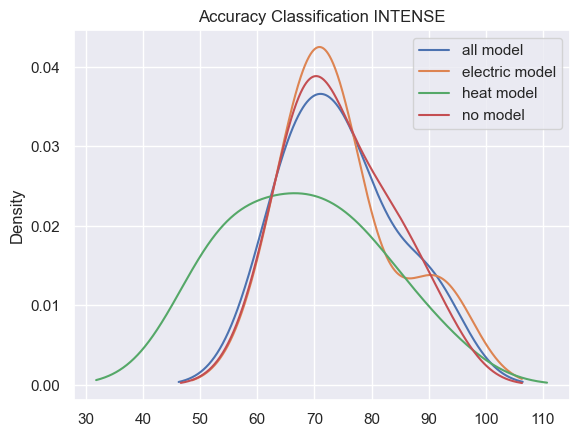

In [4]:
data_list["intense_model_all.csv"]["accuracy"].plot.kde()
data_list["intense_model_electric.csv"]["accuracy"].plot.kde()
data_list["intense_model_heat.csv"]["accuracy"].plot.kde()
data_list["intense.csv"]["accuracy"].plot.kde()
plt.legend(["all model", "electric model", "heat model", "no model"])
plt.title("Accuracy Classification INTENSE")
plt.show()